In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim

## Importation des données :

In [70]:
folder = '/home/hiba/projet/transactions-ser'
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]
df = pd.read_csv(os.path.join(folder, csv_files[0]),delimiter=';')
common_columns = list(df.columns)

In [71]:
for file in csv_files[1:]:
    df_temp = pd.read_csv(os.path.join(folder, file), delimiter=';')
    # Keep only the columns that are present in the first CSV file
    df_temp = df_temp[common_columns]
    df = df.append(df_temp, ignore_index=False)
df.to_csv('merged.csv')

/tmp/ipykernel_3147/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_3147/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_3147/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_3147/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_3147/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [72]:
df = df.replace({'None': None, 'nan': float('nan')})
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-359835,2022-03-18,1,Vente,115000.0,9001.0,None,IMMEUBLE ATLANTIDE,A651,76800,...,110.0,6.0,None,None,None,None,NaN,1.071577,49.393501,000BS
1,2022-359835,2022-03-18,1,Vente,115000.0,9001.0,None,IMMEUBLE ATLANTIDE,A651,76800,...,NaN,0.0,None,None,None,None,NaN,1.071577,49.393501,000BS
2,2022-359041,2022-01-18,1,Vente,181300.0,4.0,None,ALL DU CLOS MAJORELLE,0517,76800,...,83.0,4.0,S,sols,None,None,97.0,1.068890,49.391763,000BS
3,2022-359041,2022-01-18,1,Vente,181300.0,4.0,None,ALL DU CLOS MAJORELLE,0517,76800,...,NaN,0.0,S,sols,None,None,12.0,1.068805,49.391922,000BS
4,2022-359041,2022-01-18,1,Vente,181300.0,1.0,None,ALL DU CLOS MAJORELLE,0517,76800,...,NaN,0.0,S,sols,None,None,13.0,1.068709,49.392102,000BS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2017-545059,2017-10-25,1,Vente,170000.0,171.0,None,RUE DE PARIS,1840,76800,...,140.0,6.0,S,sols,None,None,727.0,1.106699,49.388487,000BD
90,2017-544418,2017-09-26,1,Vente,174000.0,19.0,None,RUE DE LA REPUBLIQUE,2180,76800,...,57.0,4.0,S,sols,None,None,448.0,1.105192,49.389305,000BD
91,2017-544418,2017-09-26,1,Vente,174000.0,15.0,None,RUE DE LA REPUBLIQUE,2180,76800,...,NaN,NaN,S,sols,None,None,220.0,1.104911,49.389243,000BD
92,2017-543711,2017-08-07,1,Vente,250000.0,145.0,None,RUE DE PARIS,1840,76800,...,153.0,5.0,J,jardins,POTAG,Jardin potager,685.0,1.106324,49.389849,000BD


### Nettoyage du dataFrame

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 93
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   2972 non-null   object 
 1   date_mutation                 2972 non-null   object 
 2   numero_disposition            2972 non-null   int64  
 3   nature_mutation               2972 non-null   object 
 4   valeur_fonciere               2922 non-null   float64
 5   adresse_numero                2487 non-null   float64
 6   adresse_suffixe               117 non-null    object 
 7   adresse_nom_voie              2957 non-null   object 
 8   adresse_code_voie             2957 non-null   object 
 9   code_postal                   2957 non-null   object 
 10  code_commune                  2972 non-null   int64  
 11  nom_commune                   2972 non-null   object 
 12  code_departement              2972 non-null   int64  
 13  ancie

On commence par supprimer les colonnes qui ont 50% de valeurs null

In [75]:
df = df.dropna(thresh=len(df) * 0.5, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 93
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                2972 non-null   object 
 1   date_mutation              2972 non-null   object 
 2   numero_disposition         2972 non-null   int64  
 3   nature_mutation            2972 non-null   object 
 4   valeur_fonciere            2922 non-null   float64
 5   adresse_numero             2487 non-null   float64
 6   adresse_nom_voie           2957 non-null   object 
 7   adresse_code_voie          2957 non-null   object 
 8   code_postal                2957 non-null   object 
 9   code_commune               2972 non-null   int64  
 10  nom_commune                2972 non-null   object 
 11  code_departement           2972 non-null   int64  
 12  id_parcelle                2972 non-null   object 
 13  nombre_lots                2972 non-null   int64  

Puis on supprime les lignes ou on a des valeurs nulls ainsi que les valeurs dupliqués

In [76]:
df = df.dropna(axis=0)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 2 to 93
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                1221 non-null   object 
 1   date_mutation              1221 non-null   object 
 2   numero_disposition         1221 non-null   int64  
 3   nature_mutation            1221 non-null   object 
 4   valeur_fonciere            1221 non-null   float64
 5   adresse_numero             1221 non-null   float64
 6   adresse_nom_voie           1221 non-null   object 
 7   adresse_code_voie          1221 non-null   object 
 8   code_postal                1221 non-null   object 
 9   code_commune               1221 non-null   int64  
 10  nom_commune                1221 non-null   object 
 11  code_departement           1221 non-null   int64  
 12  id_parcelle                1221 non-null   object 
 13  nombre_lots                1221 non-null   int64  

Vu qu'on s'intéresse qu'aux maisons et aux appratements, on va supprimer les autres valeurs sur la colonne "type_local"

In [77]:
df = df.drop(df[df["type_local"] == 'Local industriel. commercial ou assimilé'].index)

Puis on va supprimer les colonnes qui ont des valeurs redondantes

In [78]:
df['code_type_local'] = pd.to_numeric(df['code_type_local'], errors='coerce', downcast='integer')
df = df.drop(['id_mutation','code_postal','code_commune', 'section_prefixe','nom_commune','code_departement','id_parcelle'], axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 21 to 92
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_mutation              612 non-null    object 
 1   numero_disposition         612 non-null    int64  
 2   nature_mutation            612 non-null    object 
 3   valeur_fonciere            612 non-null    float64
 4   adresse_numero             612 non-null    float64
 5   adresse_nom_voie           612 non-null    object 
 6   adresse_code_voie          612 non-null    object 
 7   nombre_lots                612 non-null    int64  
 8   code_type_local            612 non-null    int8   
 9   type_local                 612 non-null    object 
 10  surface_reelle_bati        612 non-null    float64
 11  nombre_pieces_principales  612 non-null    float64
 12  code_nature_culture        612 non-null    object 
 13  nature_culture             612 non-null    object 

In [80]:
df

,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude
21,2021-05-28,1,Vente,375000.0,9.0,RES DU ROUVRAY 1,A751,0,1,Maison,129.0,4.0,S,sols,1765.0,1.062906,49.390630
26,2021-03-30,1,Vente,258000.0,4.0,RUE MADELEINE,1570,0,1,Maison,110.0,5.0,S,sols,496.0,1.064820,49.392608
32,2021-02-17,1,Vente,518100.0,11.0,RES DU ROUVRAY 1,A751,0,1,Maison,225.0,7.0,S,sols,2580.0,1.063380,49.391146
35,2021-02-16,1,Vente,210100.0,1.0,RUE MAURICE RAVEL,1670,0,1,Maison,76.0,4.0,S,sols,583.0,1.061246,49.393128
38,2021-01-12,1,Vente,137000.0,2.0,RUE MAURICE RAVEL,1670,0,1,Maison,63.0,4.0,S,sols,581.0,1.061040,49.392848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2018-06-29,2,Vente,131000.0,39.0,RUE DE LA REPUBLIQUE,2180,0,1,Maison,77.0,4.0,S,sols,59.0,1.105046,49.388205
84,2018-04-06,1,Vente,130000.0,68.0,RUE DE LA REPUBLIQUE,2180,0,1,Maison,96.0,6.0,S,sols,58.0,1.104715,49.388374
85,2017-12-07,1,Vente,88000.0,24.0,RUE DE LA REPUBLIQUE,2180,0,1,Maison,48.0,3.0,S,sols,30.0,1.104569,49.389613
88,2017-10-25,1,Vente,170000.0,171.0,RUE DE PARIS,1840,0,1,Maison,140.0,6.0,J,jardins,920.0,1.106699,49.388487


détection d'outliers :

In [81]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df.dtypes == 'int')
int_cols = list(s[s].index)
print("Integer variables:")
print(int_cols)

s = (df.dtypes == 'float')
float_cols = list(s[s].index)
print("Real variables:")
print(float_cols)

Categorical variables:
['date_mutation', 'nature_mutation', 'adresse_nom_voie', 'adresse_code_voie', 'type_local', 'code_nature_culture', 'nature_culture']
Integer variables:
['numero_disposition', 'nombre_lots']
Real variables:
['valeur_fonciere', 'adresse_numero', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude']


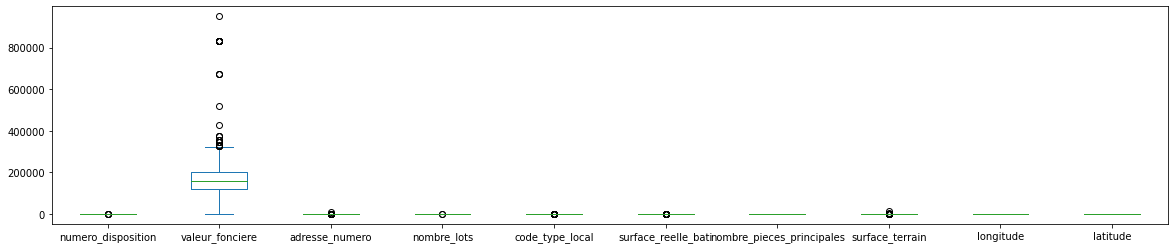

In [82]:
df.plot.box(figsize=(20, 4))

# Show the plot
plt.show()

In [84]:
largest_st = df['surface_terrain'].nlargest(5)
df = df.drop(largest_st.index)
largest_vf = df['valeur_fonciere'].nlargest(20)
df = df.drop(largest_vf.index)

In [91]:
largest_vf = df['valeur_fonciere'].nlargest(10) #40
df = df.drop(largest_vf.index)

In [93]:
largest_st = df['surface_terrain'].nlargest(5)
df = df.drop(largest_st.index)

In [105]:
largest_pp = df['nombre_pieces_principales'].nlargest(5) #10
df = df.drop(largest_pp.index)

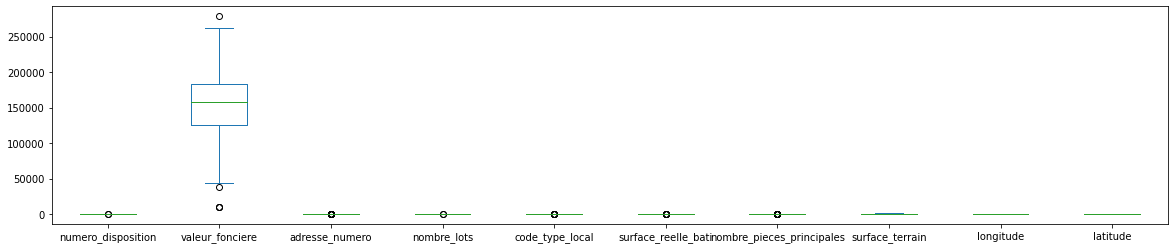

In [106]:
df.plot.box(figsize=(20, 4))

# Show the plot
plt.show()

In [128]:
largest_pp = df['nombre_pieces_principales'].nsmallest(1) #13
df = df.drop(largest_pp.index)

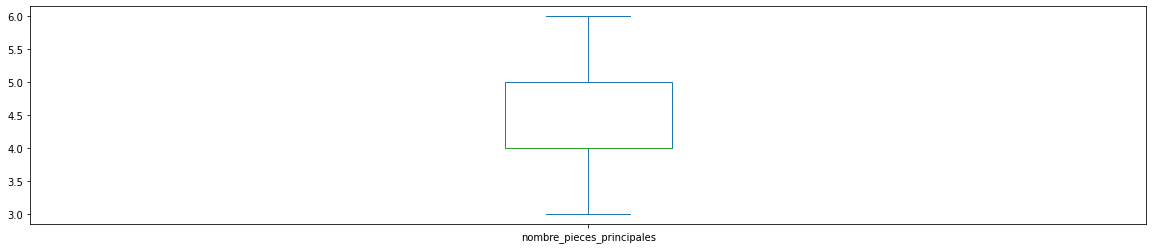

In [129]:
df['nombre_pieces_principales'].plot.box(figsize=(20, 4))

# Show the plot
plt.show()

In [124]:
largest_sr = df['surface_reelle_bati'].nlargest(1) #10
df = df.drop(largest_sr.index)

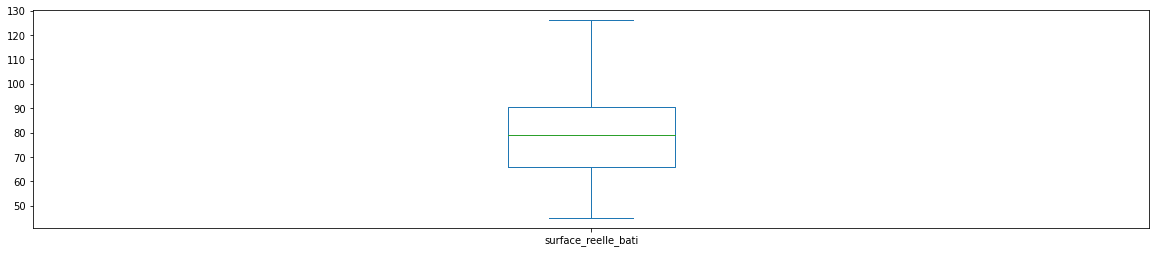

In [125]:
df['surface_reelle_bati'].plot.box(figsize=(20, 4))

# Show the plot
plt.show()

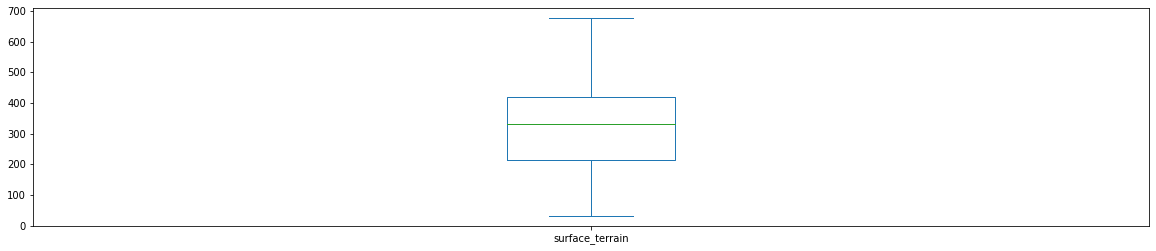

In [131]:
largest_st = df['surface_terrain'].nlargest(5) #5
df = df.drop(largest_st.index)

df['surface_terrain'].plot.box(figsize=(20, 4))

# Show the plot
plt.show()

In [137]:
df

,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,Coordinates
110,2019-02-18,1,Vente,112000.00,2.0,RUE HECTOR BERLIOZ,1110,0,1,Maison,63.0,4.0,S,sols,263.0,1.061100,49.394313,POINT (1.06110 49.39431)
121,2018-06-11,1,Vente,153000.00,13.0,RUE GEORGES BIZET,1020,0,1,Maison,63.0,4.0,S,sols,321.0,1.061597,49.394376,POINT (1.06160 49.39438)
132,2017-12-20,1,Vente,156650.00,40.0,RUE GEORGES BIZET,1020,0,1,Maison,86.0,5.0,S,sols,520.0,1.061879,49.395061,POINT (1.06188 49.39506)
146,2017-08-31,1,Vente,150000.00,8.0,RUE MAURICE RAVEL,1670,0,1,Maison,63.0,4.0,S,sols,408.0,1.060593,49.393065,POINT (1.06059 49.39306)
34,2020-12-21,1,Vente,125000.00,5.0,RUE GEORGES DE MOOR,1040,0,1,Maison,57.0,3.0,S,sols,90.0,1.111510,49.377111,POINT (1.11151 49.37711)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2017-10-16,1,Vente,147600.00,20.0,RUE DOCTEUR SEMMELWEIS,660,0,1,Maison,72.0,4.0,S,sols,385.0,1.092799,49.386935,POINT (1.09280 49.38694)
34,2019-11-26,1,Vente,192000.00,10.0,RUE MADELEINE LE QUELLEC,1571,0,1,Maison,81.0,4.0,S,sols,264.0,1.087941,49.388882,POINT (1.08794 49.38888)
100,2018-01-15,1,Vente,188276.83,13.0,RUE DANIELLE CASANOVA,0576,0,1,Maison,91.0,4.0,S,sols,261.0,1.086690,49.389921,POINT (1.08669 49.38992)
41,2019-06-27,1,Vente,70000.00,191.0,RUE DE LA REPUBLIQUE,2180,0,1,Maison,109.0,6.0,S,sols,121.0,1.105819,49.384365,POINT (1.10582 49.38437)


## Visualisation :

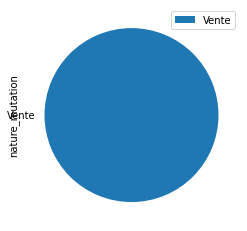

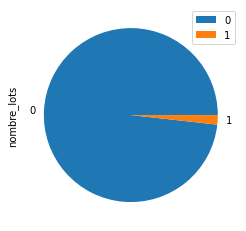

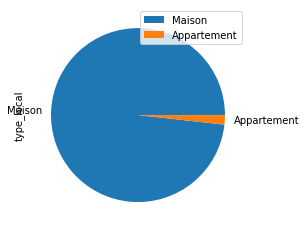

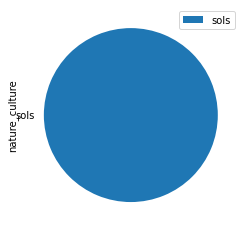

In [132]:
col = ['nature_mutation','nombre_lots','type_local','nature_culture']
for l in col :
    counts = df[[l]].apply(pd.value_counts)
    counts.plot.pie(subplots=True, figsize=(8, 4))
    plt.show()

In [466]:
df.to_csv('new_merged.csv')

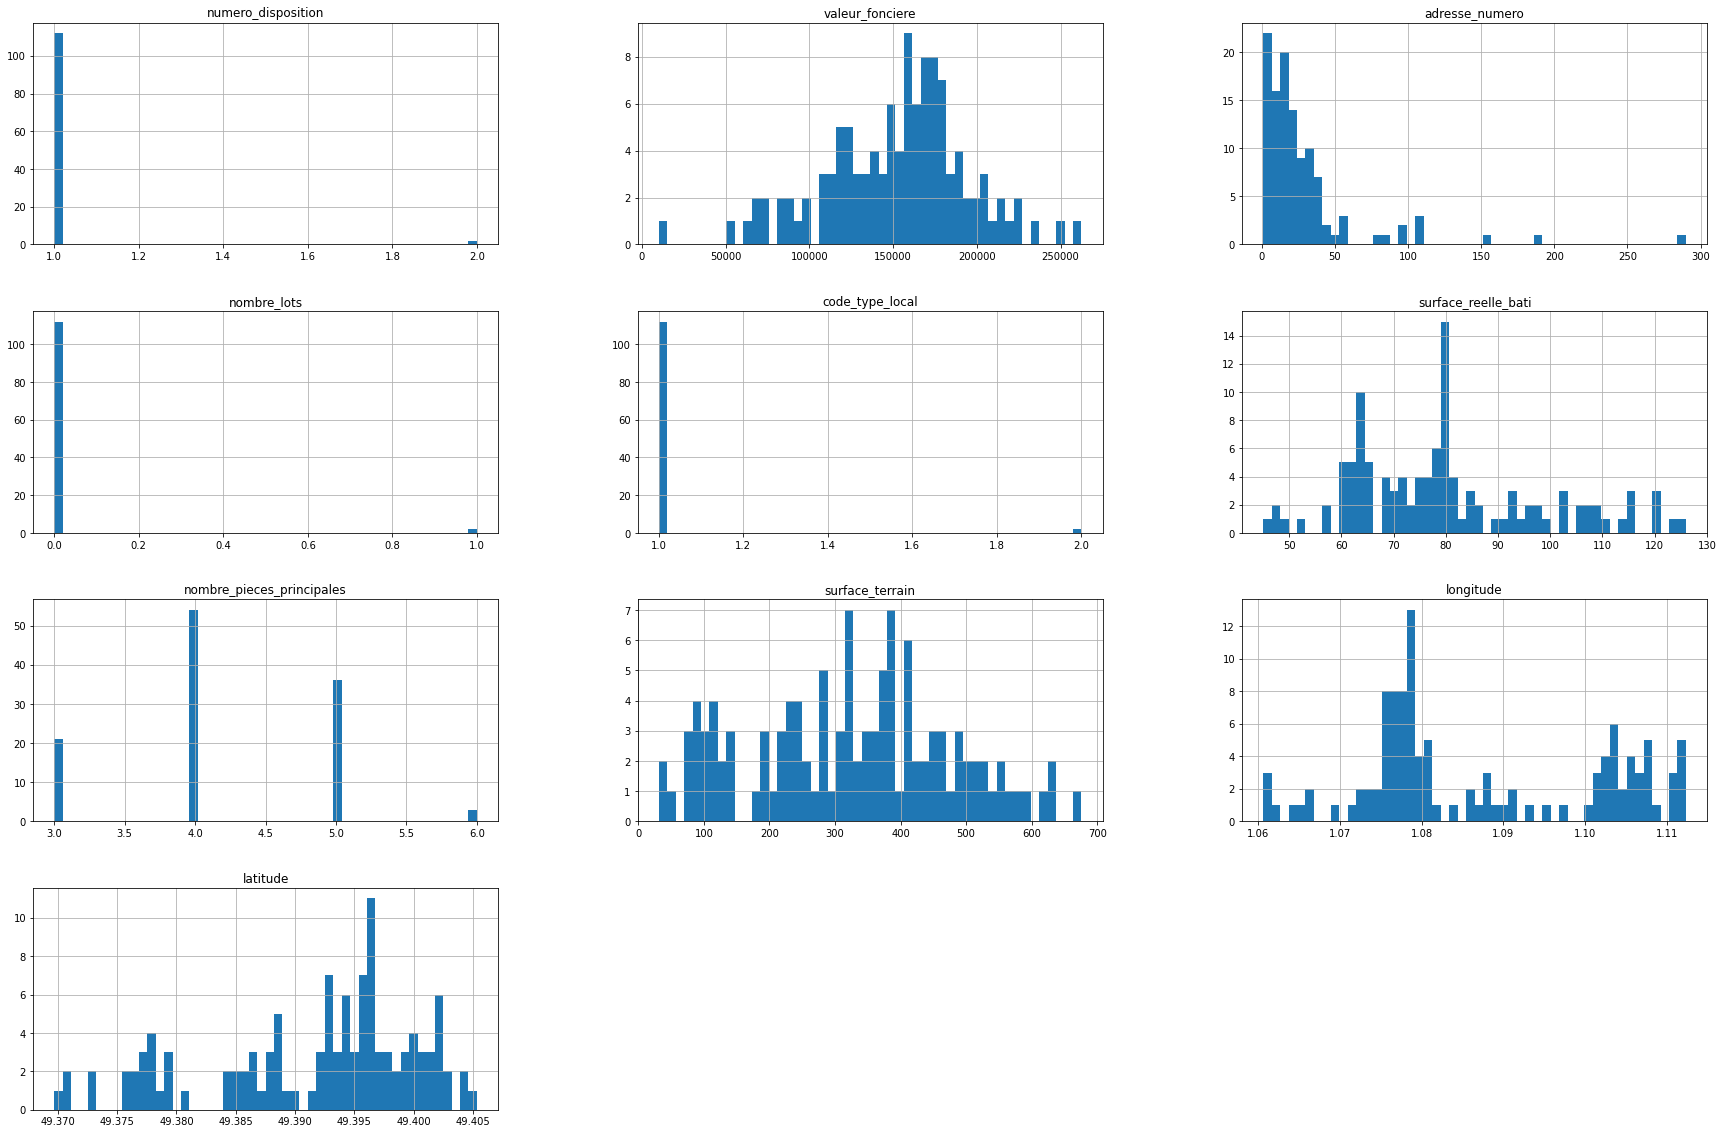

In [146]:
df.hist(bins=50, figsize=(30,20))
plt.show()
     

## Analyse exploratoire des données :
On essaie de trouver les valeurs qui influencent les prix :

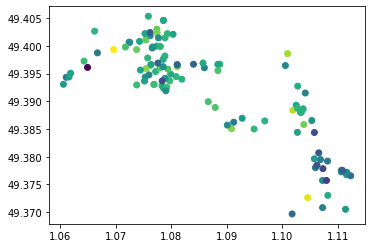

In [147]:
from shapely.geometry import Point

df['Coordinates'] = df.apply(lambda x: Point((x['longitude'], x['latitude'])), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf.plot(column='valeur_fonciere')
plt.show()

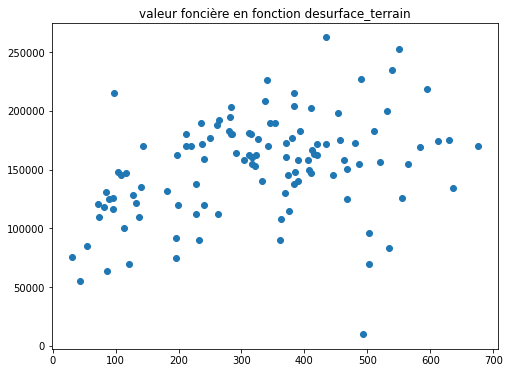

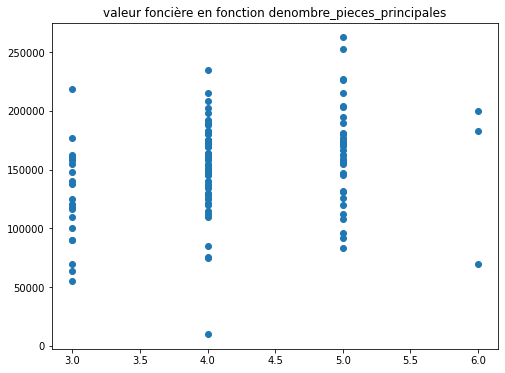

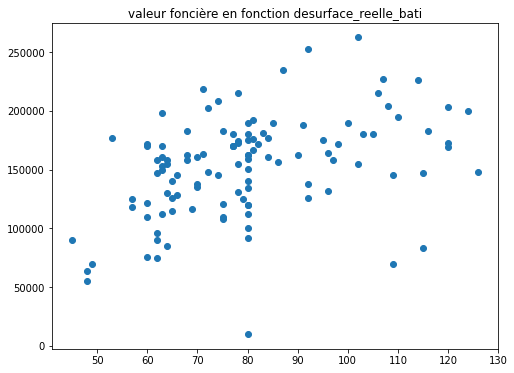

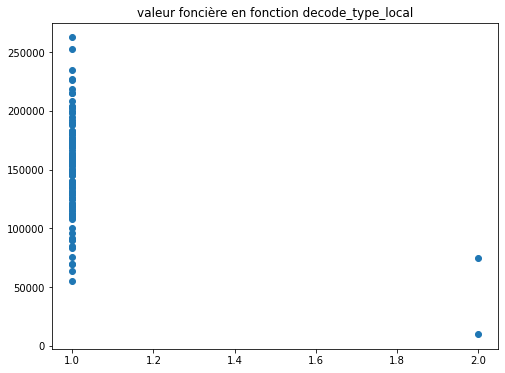

In [135]:
"""largest = df['surface_terrain'].nlargest(10)
df = df.drop(largest.index)
"""
col2 = ['surface_terrain', 'nombre_pieces_principales','surface_reelle_bati','code_type_local']
for l in col2 :
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter( df[[l]],df['valeur_fonciere'])
    plt.title('valeur foncière en fonction de' + l)
    plt.show()

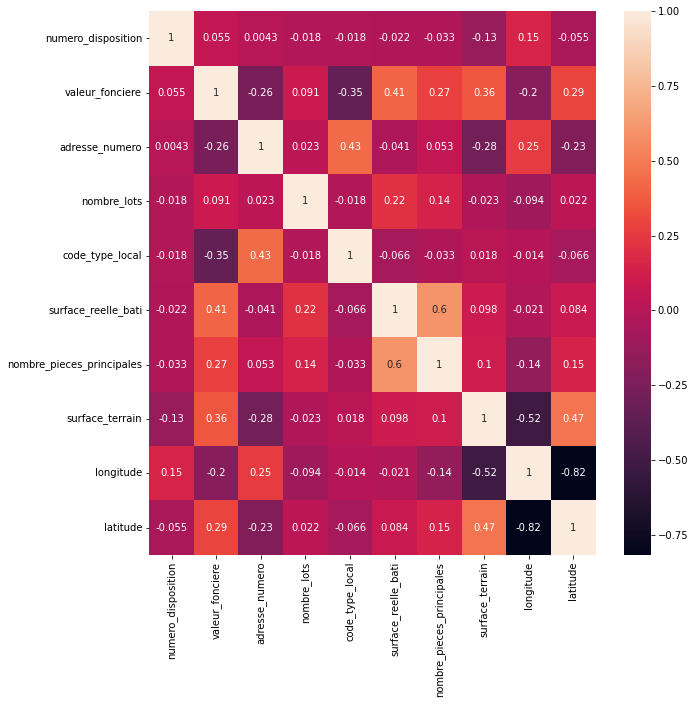

In [136]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

## Régression linéaire :

In [138]:
X = df[['code_type_local','surface_reelle_bati','surface_terrain','nombre_pieces_principales']]
y = df['valeur_fonciere']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [141]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [142]:
print(lm.intercept_)
accuracy = lm.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

188044.91585827494


'Accuracy: 30%'

In [143]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

coeff_df

,Coefficient
code_type_local,-108321.859141
surface_reelle_bati,415.049830
surface_terrain,92.617960
nombre_pieces_principales,2430.844288


In [144]:
predictions = lm.predict(X_test)

(0.0, 2000000.0)

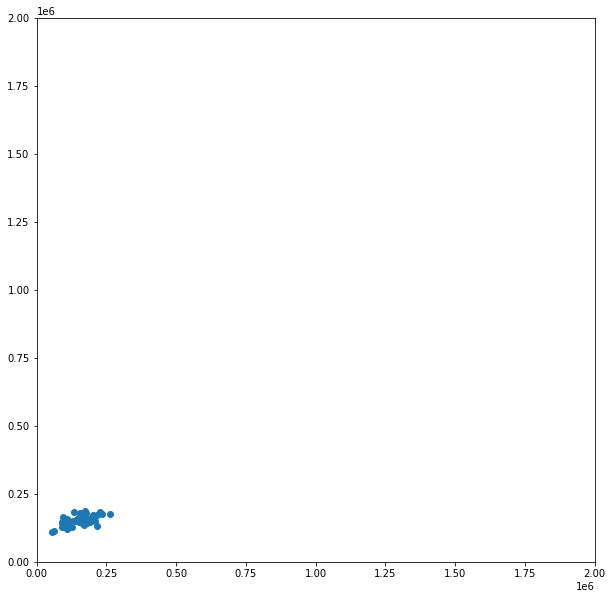

In [145]:
#plt.ticklabel_format(style = 'plain')
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test,predictions)
ax.set_xlim(0,2000000 )
ax.set_ylim(0,2000000 )

/home/hiba/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


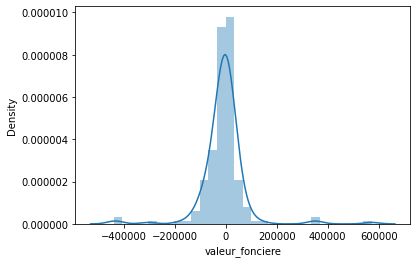

In [662]:
sns.distplot((y_test-predictions),bins=30)
ax = plt.gca()
ax.ticklabel_format(style='plain')

# Show the plot
plt.show()

In [663]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 45101.54788657532
MSE: 7565036541.354784
RMSE: 86977.21851930415


In [690]:
#lasso :
from sklearn.linear_model import Lasso

y = df['valeur_fonciere']
X = df.drop(['valeur_fonciere'],axis=1)
X = X.drop(["date_mutation","type_local","nature_culture","Coordinates"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=42, shuffle=True)

In [691]:
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train,y_train)

/home/hiba/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.4, normalize=True)

In [693]:
lasso_df = pd.DataFrame(np.array([lasso.coef_]), columns=X.columns)

for col in lasso_df.columns:
    if lasso_df[col].iloc[0]<1000:
        lasso_df.drop(col, axis=1, inplace=True)

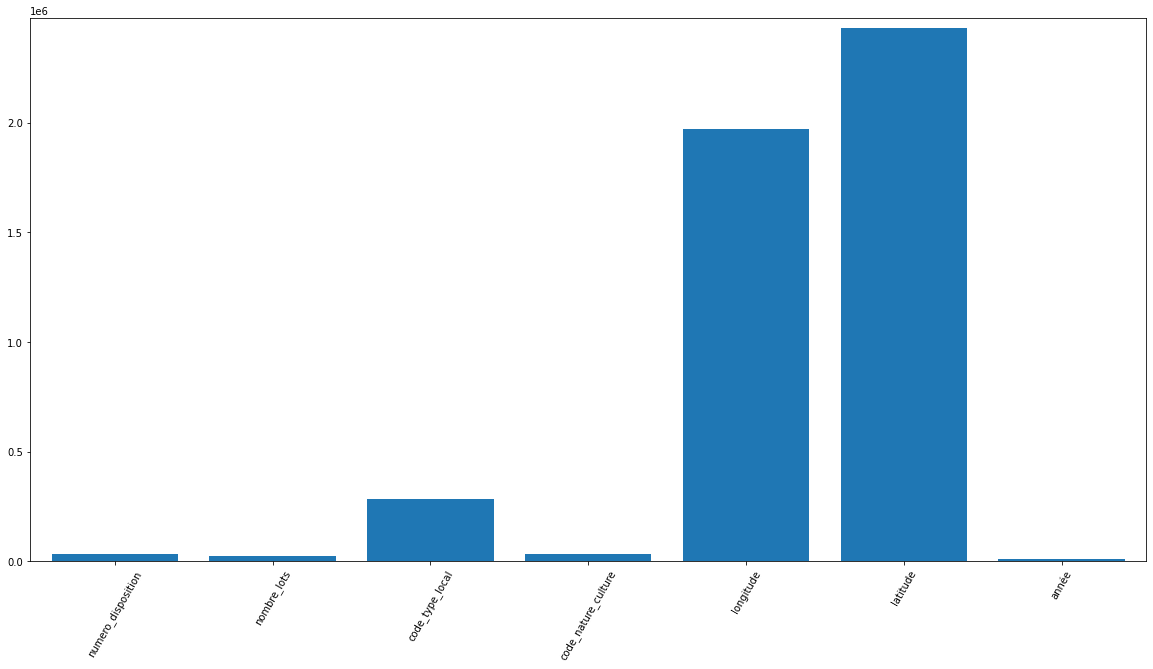

In [694]:
col_rang = range(len(lasso_df.columns))

plt.figure(figsize=(20,10))
plt.bar(col_rang, lasso_df.iloc[0])
plt.xticks(col_rang, lasso_df.columns, rotation=60)
plt.margins(0.02)
plt.show()